Import libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Load and convert data into csv

In [72]:
iris_json = load_iris()
iris= pd.DataFrame(data= np.c_[iris_json['data'], iris_json['target']],
                 columns= iris_json['feature_names'] +['target'] )

iris['Species'] = pd.Categorical.from_codes(iris_json.target, iris_json.target_names)
del iris['target']
print(iris)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       Species  
0       se

Visualize data

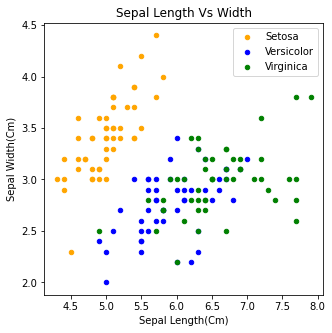

In [56]:
#Scatterplot
fig = iris[iris.Species == 'setosa'].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='orange', label='Setosa')
iris[iris.Species == 'versicolor'].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'virginica'].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length(Cm)')
fig.set_ylabel('Sepal Width(Cm)')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()



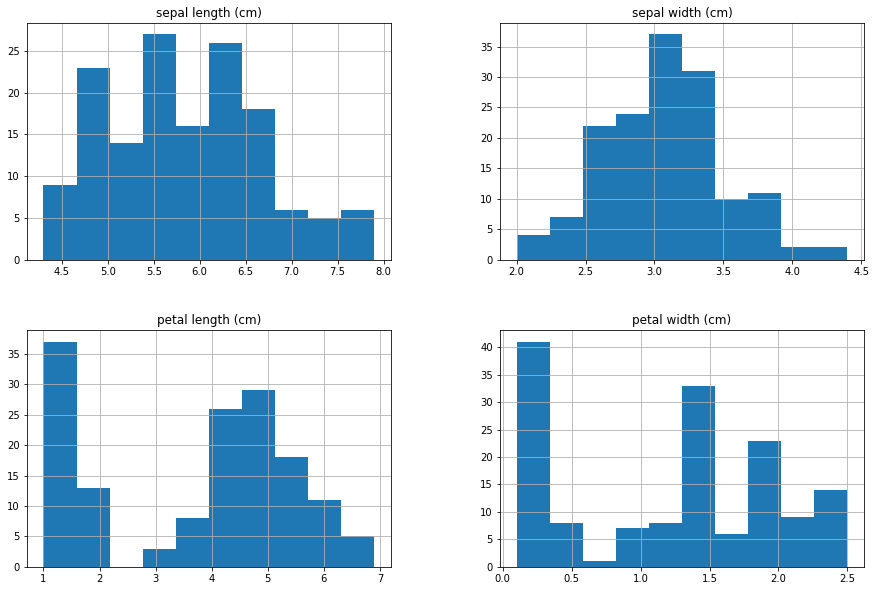

In [70]:
#histogram
iris.hist()
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

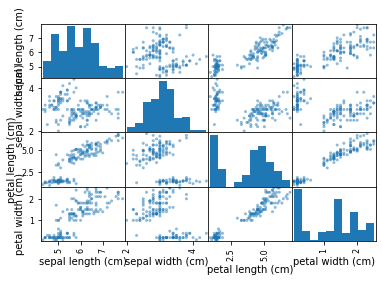

In [63]:
#scatter matrix
pd.plotting.scatter_matrix(iris)
plt.show()

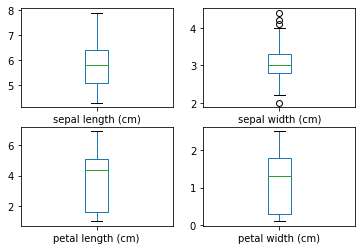

In [75]:
#boxplot
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [77]:
print (iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


import packages 

In [39]:

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [40]:
train, test = train_test_split(iris, test_size=0.25) 
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


Split train and test datasets

In [41]:
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
train_y = train.Species 

test_X = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
test_y = test.Species 
print(train_X.head())
print(test_X.head())

print(train_y.head())
print(test_y.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
65                 6.7               3.1                4.4               1.4
100                6.3               3.3                6.0               2.5
139                6.9               3.1                5.4               2.1
10                 5.4               3.7                1.5               0.2
28                 5.2               3.4                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
31                 5.4               3.4                1.5               0.4
54                 6.5               2.8                4.6               1.5
38                 4.4               3.0                1.3               0.2
19                 5.1               3.8                1.5               0.3
122                7.7               2.8                6.7               2.0
65     versicolor
100     virginica
139     virginica
10        

In [42]:
model = svm.SVC() 
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) 


The accuracy of the SVM is:  0.9736842105263158


In [43]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))


The accuracy of Logistic Regression is:  0.9736842105263158


In [44]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.8947368421052632


In [45]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9473684210526315


The accuracy for the KNN models using different values of n

([<matplotlib.axis.XTick at 0x7f2d2d4902b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

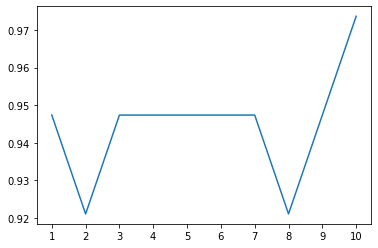

In [46]:
a_index = list(range(1,11))
a = pd.Series(dtype=('float64'))
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)
